<a href="https://colab.research.google.com/github/2060saha/Sign-Language-Classification/blob/main/Sign_Language_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all libraries here
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical  #'keras' is used to make the implementation of neural networks easy

In [2]:
from keras.models import Sequential  #'sequential'deals with ordering or sequencing of layers within a model.
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

In [3]:
from google.colab import files  #importing files in colab
uploaded = files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [4]:
train = pd.read_csv('sign_mnist_train.csv')  #reading the training dataset
test = pd.read_csv('sign_mnist_test.csv')    #reading the testing dataset

In [5]:
# Set datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

In [6]:
# To define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is:  A


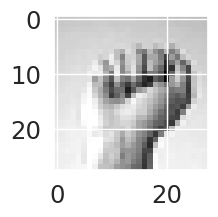

In [51]:
#plot a few images and labels
i = random.randint(1,train.shape[0])  #to check whether the dataset is working or not
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray') 
print("Label for the image is: ", class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

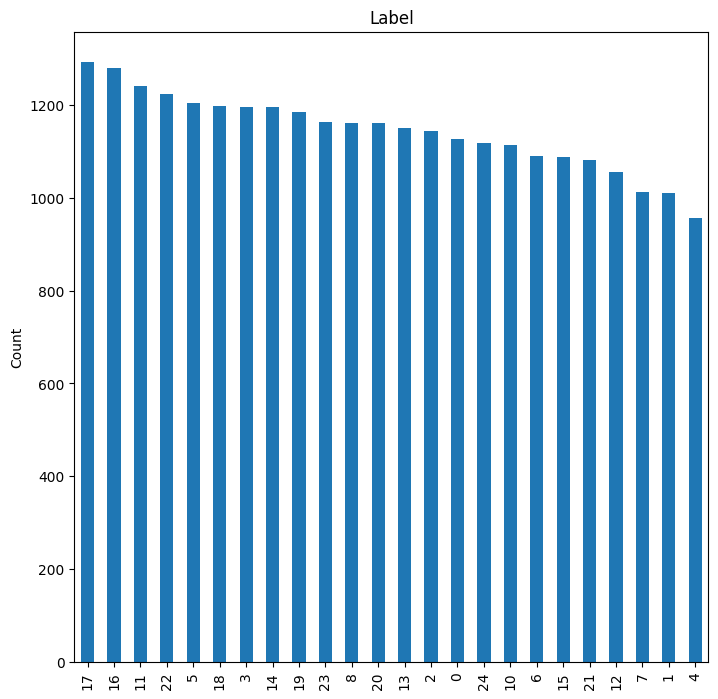

In [8]:
# Data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

Here, dataset seems to be exactly balanced.

In [9]:
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [10]:
#if we are using cross categorical entropy, then convert y to categorical
# and, if we're using sparse cross categorical entropy, so no need of conversion
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

In [11]:
y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [12]:
#Reshape(changing the shape of an array) for the neural network
#basically,by reshaping we can add or remove dimensions or change number of elements in each dimension.
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [13]:
#Now, it's the time for implementation of Model.
model = Sequential()

In [14]:
model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu')) #Conv2D parameter is the numbers of filters that convolutional layers will learn from.
model.add(MaxPooling2D(pool_size = (2, 2)))                               #Max Pooling is used to reduce the spatial dimensions of the output volume.
model.add(Dropout(0.2))                #dropout is a technique where randomly selected neurons are ignored during training

In [15]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))        #always,take the number of convolution layers in the power of 2 for better perormance.
model.add(Dropout(0.2))

In [16]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))      #'relu' does not activate all the neurons at the same time.
model.add(Dropout(0.2))

In [17]:
model.add(Flatten())  #used to return a copy of a given array in such a way that it is collapsed into one dimension

In [18]:
model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))  #softmax()is an activation function that is used mainly for classification tasks

In [19]:
#If your targets are one-hot encoded, use categorical_crossentropy. 
# If your targets are integers, use sparse_categorical_crossentropy. 

#model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [20]:
#history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))


Epoch 1/10
215/215 [==============================] - 21s 92ms/step - loss: 2.6260 - acc: 0.1901 - val_loss: 1.6497 - val_acc: 0.4921
Epoch 2/10
215/215 [==============================] - 19s 88ms/step - loss: 1.1878 - acc: 0.6058 - val_loss: 0.8668 - val_acc: 0.6874
Epoch 3/10
215/215 [==============================] - 20s 91ms/step - loss: 0.6744 - acc: 0.7718 - val_loss: 0.5392 - val_acc: 0.8147
Epoch 4/10
215/215 [==============================] - 19s 89ms/step - loss: 0.4389 - acc: 0.8494 - val_loss: 0.4251 - val_acc: 0.8518
Epoch 5/10
215/215 [==============================] - 20s 94ms/step - loss: 0.3022 - acc: 0.8986 - val_loss: 0.3140 - val_acc: 0.8830
Epoch 6/10
215/215 [==============================] - 21s 96ms/step - loss: 0.2188 - acc: 0.9263 - val_loss: 0.2532 - val_acc: 0.9067
Epoch 7/10
215/215 [==============================] - 19s 90ms/step - loss: 0.1606 - acc: 0.9468 - val_loss: 0.2545 - val_acc: 0.9103
Epoch 8/10
215/215 [==============================] - 19s 87ms

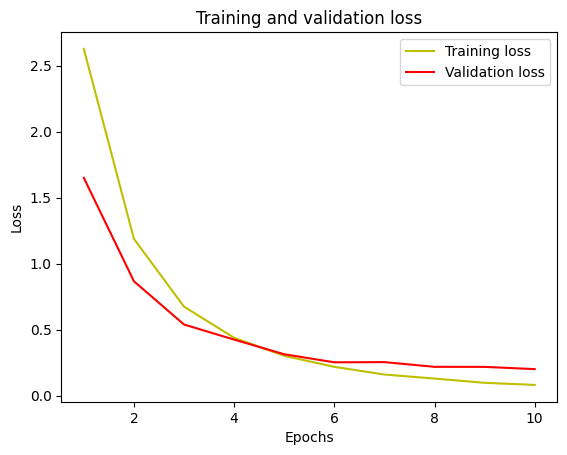

In [21]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']

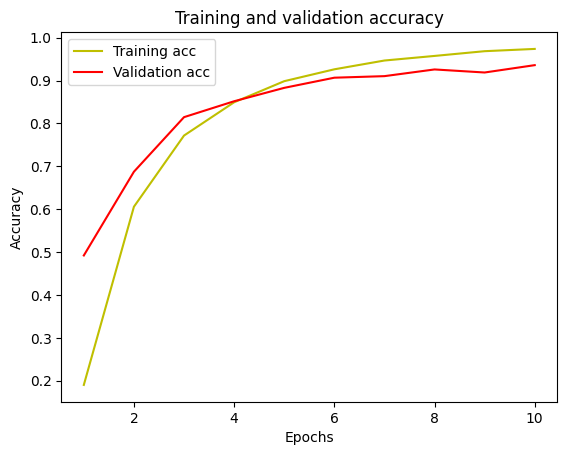

In [23]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
predictx=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

225/225 [==============================] - 1s 7ms/step


In [31]:
from sklearn.metrics import accuracy_score   #importing sklearn library, that is,used for data analysis.
accuracy = accuracy_score(y_test, classes_x)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.9360011154489682


Predicted Label:  G
True Label:  G


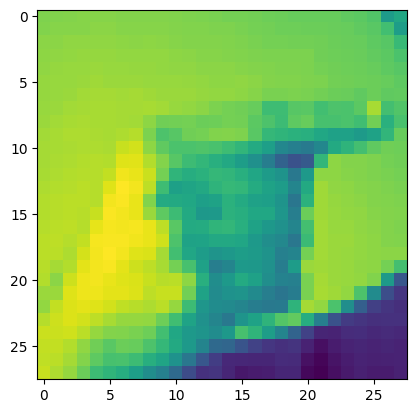

In [34]:
i = random.randint(1,len(classes_x))
plt.imshow(X_test[i,:,:,0])    #predicting different samples from the given dataset
print("Predicted Label: ", class_names[int(classes_x[i])])
print("True Label: ", class_names[int(y_test[i])])

Predicted Label:  N
True Label:  N


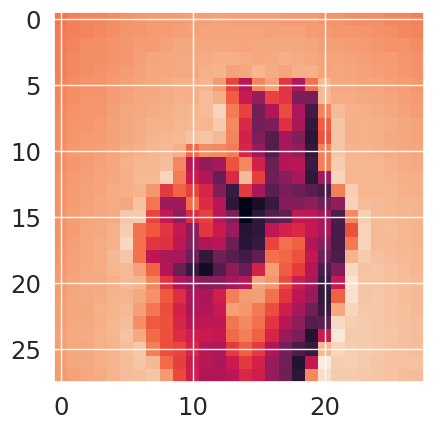

In [49]:
i = random.randint(1,len(classes_x))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(classes_x[i])])
print("True Label: ", class_names[int(y_test[i])])

Predicted Label:  Y
True Label:  Y


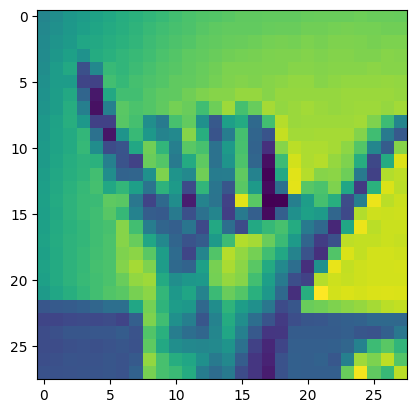

In [35]:
i = random.randint(1,len(classes_x))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(classes_x[i])])
print("True Label: ", class_names[int(y_test[i])])

Predicted Label:  P
True Label:  P


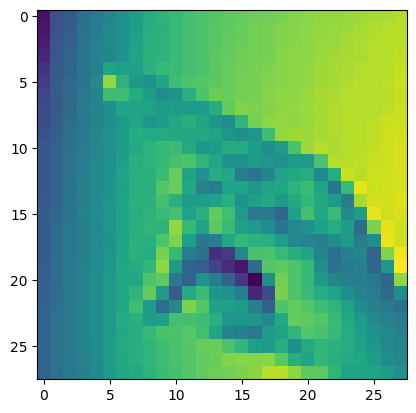

In [36]:
i = random.randint(1,len(classes_x))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(classes_x[i])])
print("True Label: ", class_names[int(y_test[i])])

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#to print confusion matrix
cm = confusion_matrix(y_test, classes_x)  #confusion matrix is used for showing the accuracy of the classification problem.

<Axes: >

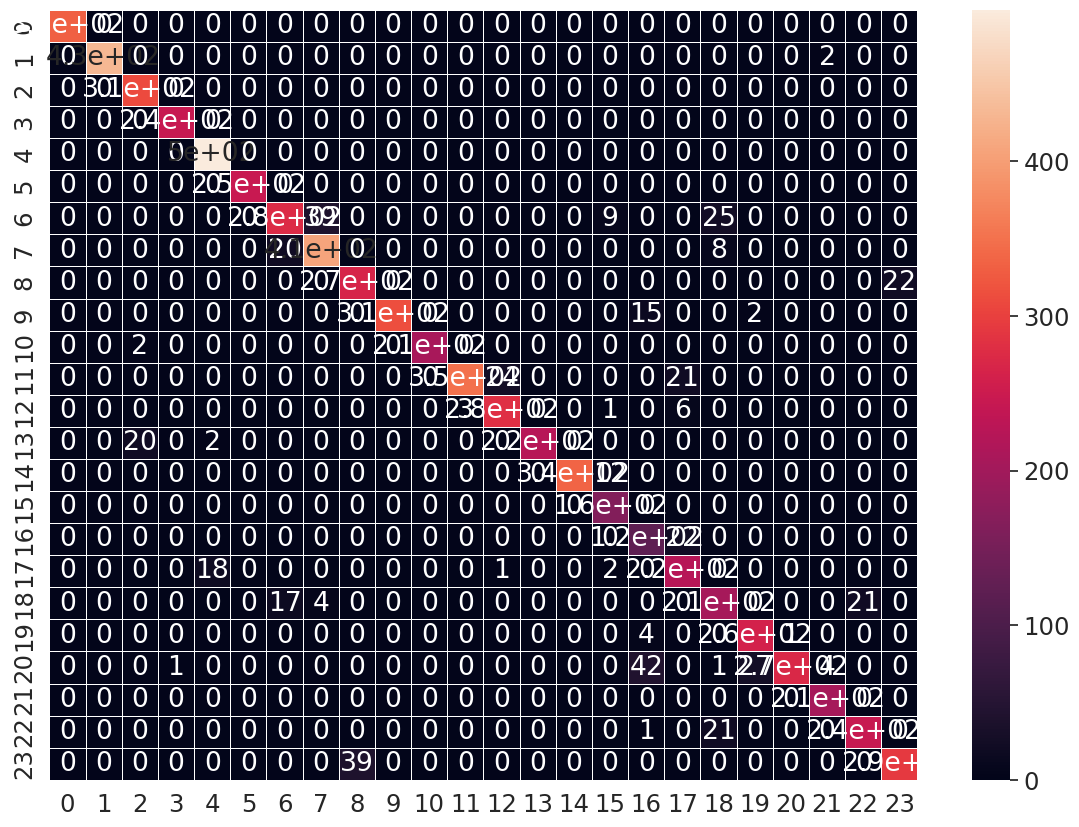

In [45]:
fig, ax = plt.subplots(figsize=(14,10))  #it's basically showing the visual representation of 'cm' to say which one is correctly identified and which one is not. 
sns.set(font_scale=1.6)                         
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

ValueError: ignored

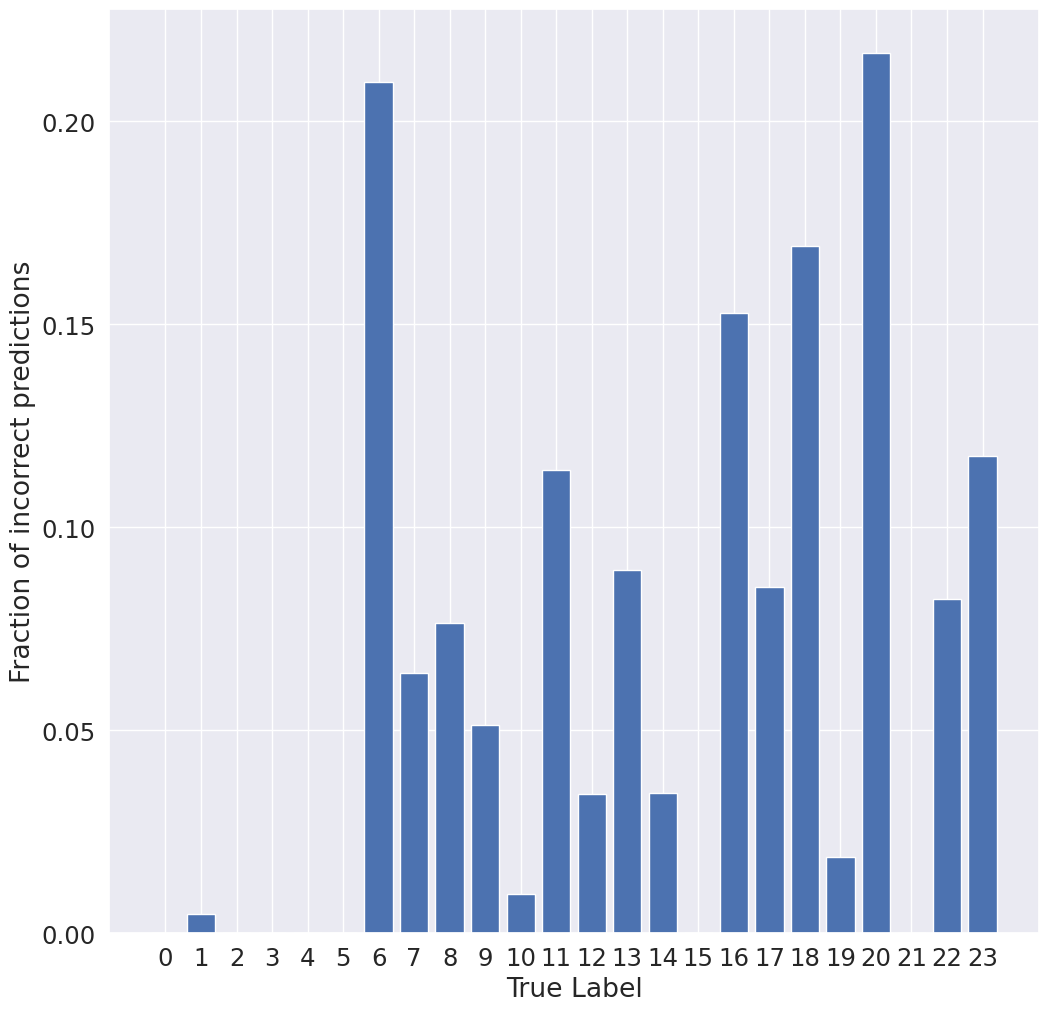

In [48]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)  #it will show the incorrect classifications .
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24,), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(24), class_names) 